<a href="https://colab.research.google.com/github/ITALOZDKJ/Me-tornando-um-analista-de-dados/blob/main/times_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this notebook, I start my studies with times series
## In the future, I want apply this knowledge on finance marketplace  

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

### 1) Aquisition of action data

In [ ]:
ticket = yf.Ticker('^BVSP')
#df = ticket.history(period='3y', interval= '1mo')
df = ticket.history(interval='1d', start='2018-01-01', end='2021-01-01')


In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0
2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0
2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0
2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0
2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0
...,...,...,...,...,...,...,...
2020-12-22,115825.0,116903.0,115648.0,116348.0,6947900,0,0
2020-12-23,116636.0,118311.0,116636.0,117857.0,6483300,0,0
2020-12-28,117806.0,119213.0,117805.0,119051.0,7171700,0,0


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-22,115825.0,116903.0,115648.0,116348.0,6947900,0,0
2020-12-23,116636.0,118311.0,116636.0,117857.0,6483300,0,0
2020-12-28,117806.0,119213.0,117805.0,119051.0,7171700,0,0
2020-12-29,119130.0,119861.0,118750.0,119475.0,6769700,0,0
2020-12-30,119410.0,120150.0,118919.0,119306.0,8235700,0,0


### 2) Decomposition of a
times series

#### Modelos matemáticos
#### Adidite Model
        y(t) = Tend_t + Seasonality_t + Noise_t
#### Multiplicative Model
    y(t) = Tend_t * Seasonality_t * Noise_t

In [ ]:
df[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 738 entries, 2018-01-02 to 2020-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   738 non-null    float64
dtypes: float64(1)
memory usage: 11.5 KB


In [ ]:
df[['Close']].head()

,Close
Date,
2018-01-02,77891.0
2018-01-03,77995.0
2018-01-04,78647.0
2018-01-05,79071.0
2018-01-08,79379.0


In [ ]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

In [ ]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', period = 30, extrapolate_trend=30)

<AxesSubplot:xlabel='Date'>

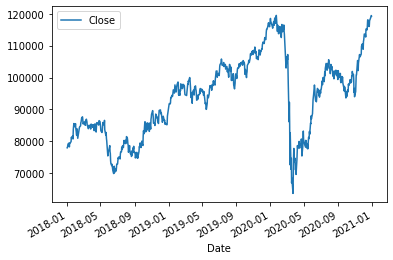

In [ ]:
df[['Close']].plot()

In [ ]:
df['Close'].head()

Date
2018-01-02    77891.0
2018-01-03    77995.0
2018-01-04    78647.0
2018-01-05    79071.0
2018-01-08    79379.0
Name: Close, dtype: float64

In [ ]:
decomposicao.trend + decomposicao.seasonal + decomposicao.resid

Date
2018-01-02     77891.0
2018-01-03     77995.0
2018-01-04     78647.0
2018-01-05     79071.0
2018-01-08     79379.0
                ...   
2020-12-22    116348.0
2020-12-23    117857.0
2020-12-28    119051.0
2020-12-29    119475.0
2020-12-30    119306.0
Length: 738, dtype: float64

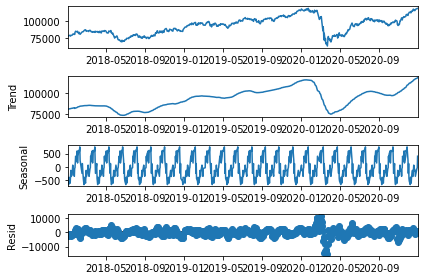

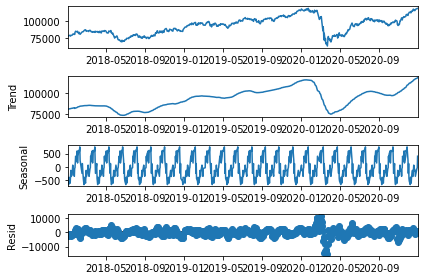

In [ ]:
decomposicao.plot()

In [ ]:
decomposicao_multi = seasonal_decompose(df[['Close']], model='multiplicative', period = 30, extrapolate_trend=30)

In [ ]:
decomposicao_multi.seasonal

Date
2018-01-02    0.995060
2018-01-03    0.993866
2018-01-04    0.992221
2018-01-05    0.995142
2018-01-08    0.994795
                ...   
2020-12-22    0.999016
2020-12-23    0.996295
2020-12-28    0.999866
2020-12-29    1.000383
2020-12-30    1.005108
Name: seasonal, Length: 738, dtype: float64

In [ ]:
decomposicao.seasonal

Date
2018-01-02   -432.417769
2018-01-03   -530.715330
2018-01-04   -661.547557
2018-01-05   -386.401386
2018-01-08   -412.778625
                 ...    
2020-12-22   -119.953775
2020-12-23   -350.220348
2020-12-28    -53.545970
2020-12-29    -28.361648
2020-12-30    405.056008
Name: seasonal, Length: 738, dtype: float64

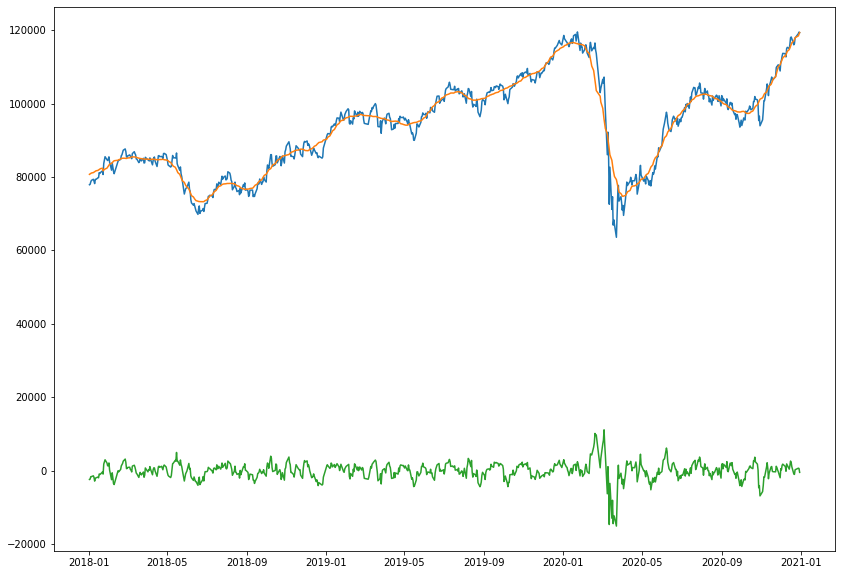

In [ ]:
ax, fig = plt.subplots(figsize=(14,10))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)
plt.plot(decomposicao.resid)

In [ ]:
help(df[['Close']].rolling)

Help on method rolling in module pandas.core.generic:

rolling(window: 'int | timedelta | BaseOffset | BaseIndexer', min_periods: 'int | None' = None, center: 'bool_t' = False, win_type: 'str | None' = None, on: 'str | None' = None, axis: 'Axis' = 0, closed: 'str | None' = None, method: 'str' = 'single') method of pandas.core.frame.DataFrame instance
    Provide rolling window calculations.
    
    Parameters
    ----------
    window : int, offset, or BaseIndexer subclass
        Size of the moving window. This is the number of observations used for
        calculating the statistic. Each window will be a fixed size.
    
        If its an offset then this will be the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes.
    
        If a BaseIndexer subclass is passed, calculates the window boundaries
        based on the defined ``get_window_bounds`` method

In [ ]:
media_movel7 = df[['Close']].rolling(7).mean()
media_movel14 = df[['Close']].rolling(14).mean()
media_movel21 = df[['Close']].rolling(21).mean()

In [ ]:
help(df.rolling)

Help on method rolling in module pandas.core.generic:

rolling(window: 'int | timedelta | BaseOffset | BaseIndexer', min_periods: 'int | None' = None, center: 'bool_t' = False, win_type: 'str | None' = None, on: 'str | None' = None, axis: 'Axis' = 0, closed: 'str | None' = None, method: 'str' = 'single') method of pandas.core.frame.DataFrame instance
    Provide rolling window calculations.
    
    Parameters
    ----------
    window : int, offset, or BaseIndexer subclass
        Size of the moving window. This is the number of observations used for
        calculating the statistic. Each window will be a fixed size.
    
        If its an offset then this will be the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes.
    
        If a BaseIndexer subclass is passed, calculates the window boundaries
        based on the defined ``get_window_bounds`` method

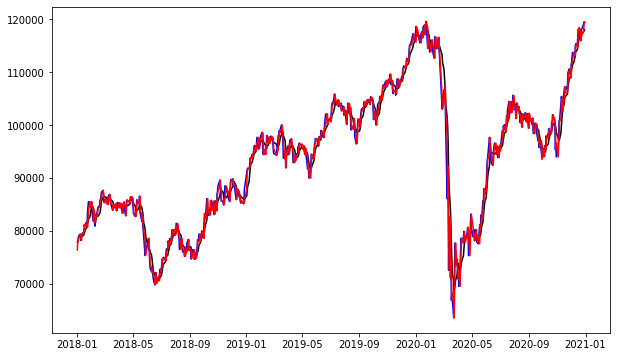

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(media_movel7, 'black')
plt.plot(df[['Close']],'blue')
plt.plot(df[['Open']], 'red')

In [ ]:
help(plt.subplots) 

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

In [ ]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

#### CONTINUE...